# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

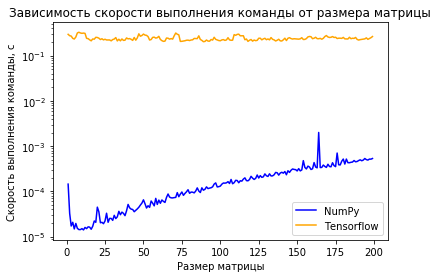

In [0]:
import time

sess = tf.Session()

array_size = [int(i) for i in range(1, 200)]
tf_time_spent = []
np_time_spent = []

#tensorflow
for n in array_size:
    x = tf.placeholder("float32", shape=(n,n))
    y = tf.reduce_sum(tf.diag_part(x))

    begin = time.time()
    sess.run(y, {x: np.random.random((n, n))})
    end = time.time()
    time_spent = end - begin
    tf_time_spent += [time_spent]

#numpy
for n in array_size:
    begin = time.time()
    x = np.sum(np.trace(np.random.rand(n, n)))
    end = time.time()
    time_spent = end - begin
    np_time_spent += [time_spent]


plt.title("Зависимость скорости выполнения команды от размера матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Скорость выполнения команды, с")
plt.yscale('log')
plt.plot(array_size, np_time_spent, color="blue", label="NumPy")
plt.plot(array_size, tf_time_spent, color="orange", label="Tensorflow")
plt.legend(loc="lower right")
plt.show()

sess.close()

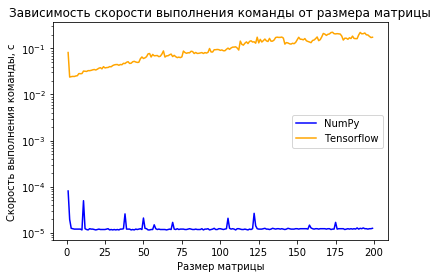

In [0]:
sess = tf.Session()

array_size = [int(i) for i in range(1, 200)]
tf_time_spent = []
np_time_spent = []

#tensorflow
for n in array_size:
    x1 = tf.placeholder("float32", shape=(1,n))
    y1 = tf.placeholder("float32", shape=(n,1))
    z = tf.acos(tf.tensordot(x1, y1, 1) / tf.linalg.norm(x1) * tf.linalg.norm(y1))  

    begin = time.time()
    sess.run(z, {x1: np.random.rand(1, n), y1: np.random.rand(n, 1)})
    end = time.time()
    time_spent = end - begin
    tf_time_spent += [time_spent]

#numpy
for n in array_size:
    x1 = np.random.random((1, n))
    y1 = np.random.random((n, 1))

    begin = time.time()
    z1 = np.arccos(np.dot(x1, y1) / (np.linalg.norm(x1) * np.linalg.norm(y1)))
    end = time.time()
    time_spent = end - begin
    np_time_spent += [time_spent]


plt.title("Зависимость скорости выполнения команды от размера матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Скорость выполнения команды, с")
plt.yscale('log')
plt.plot(array_size, np_time_spent, color="blue", label="NumPy")
plt.plot(array_size, tf_time_spent, color="orange", label="Tensorflow")
plt.legend(loc="center right")
plt.show()

sess.close()

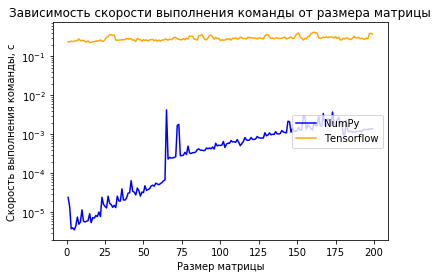

In [0]:
sess = tf.Session()

array_size = [int(i) for i in range(1, 200)]
tf_time_spent = []
np_time_spent = []

#tensorflow
for n in array_size:
    x2 = tf.placeholder("float32", shape=(n,n))
    y2 = tf.placeholder("float32", shape=(n,n))
    f = tf.subtract(tf.matmul(x2, y2), tf.matmul(y2, x2))

    begin = time.time()
    sess.run(f, {x2: np.random.random((n, n)), y2: np.random.random((n, n))})
    end = time.time()
    time_spent = end - begin
    tf_time_spent += [time_spent]

#numpy
for n in array_size:
    a = np.random.random((n, n))
    b = np.random.random((n, n))

    begin = time.time()
    c = np.subtract(np.dot(a, b), np.dot(b, a))
    end = time.time()
    time_spent = end - begin
    np_time_spent += [time_spent]

plt.title("Зависимость скорости выполнения команды от размера матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Скорость выполнения команды, с")
plt.yscale('log')
plt.plot(array_size, np_time_spent, color="blue", label="NumPy")
plt.plot(array_size, tf_time_spent, color="orange", label="Tensorflow")
plt.legend(loc="center right")
plt.show()

sess.close()

Библиотека NumPy рассчитана для использования CPU, а Tensorflow предназначен для решения более сложных задач и работы с графическими процессорами, поэтому оптимальнее использовать его GPU версию (в таком случае на больших объёмах данных он покажет более высокую производительность, чем NumPy). Также не стоит забывать, что NumPy написан в основном на C++, что подразумевает достаточно быстрое выполнение операций.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [0]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

In [0]:
momentums = [1.5, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
momentum_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'lime', 'royalblue', 'darkgoldenrod']

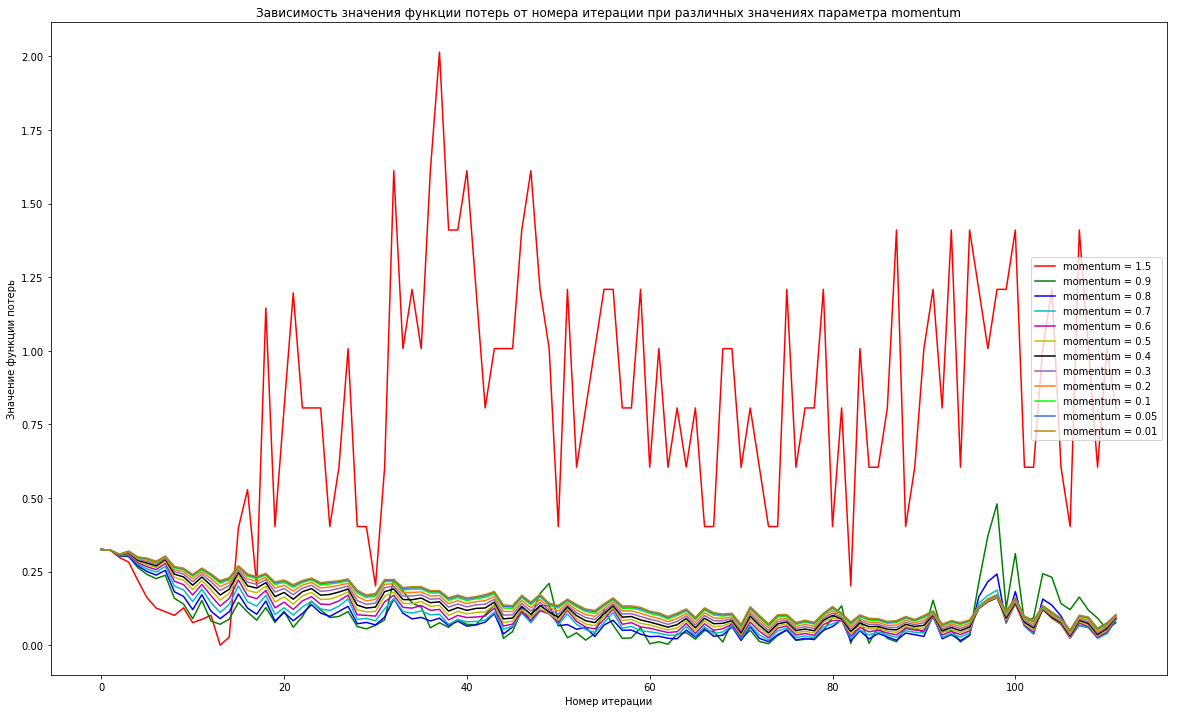

In [0]:
plt.figure(figsize=(20, 12))
for i in range(len(momentum_colors)):
  nn_mnist = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=momentums[i])
  pred = train(X, y, train_op=nn_mnist.minimize(loss))
  plt.plot(pred, color=momentum_colors[i], label="momentum = "+str(momentums[i]))
plt.legend(loc="center right")
plt.title("Зависимость значения функции потерь от номера итерации при различных значениях параметра momentum")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции потерь")

plt.show()

На графике плохо становится видно разницу между значениями 0.6 и меньше, построим их дополнительно.

In [0]:
momentums = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
momentum_colors = ['m', 'y', 'k', 'tab:purple', 'tab:orange', 'lime', 'royalblue', 'darkgoldenrod']

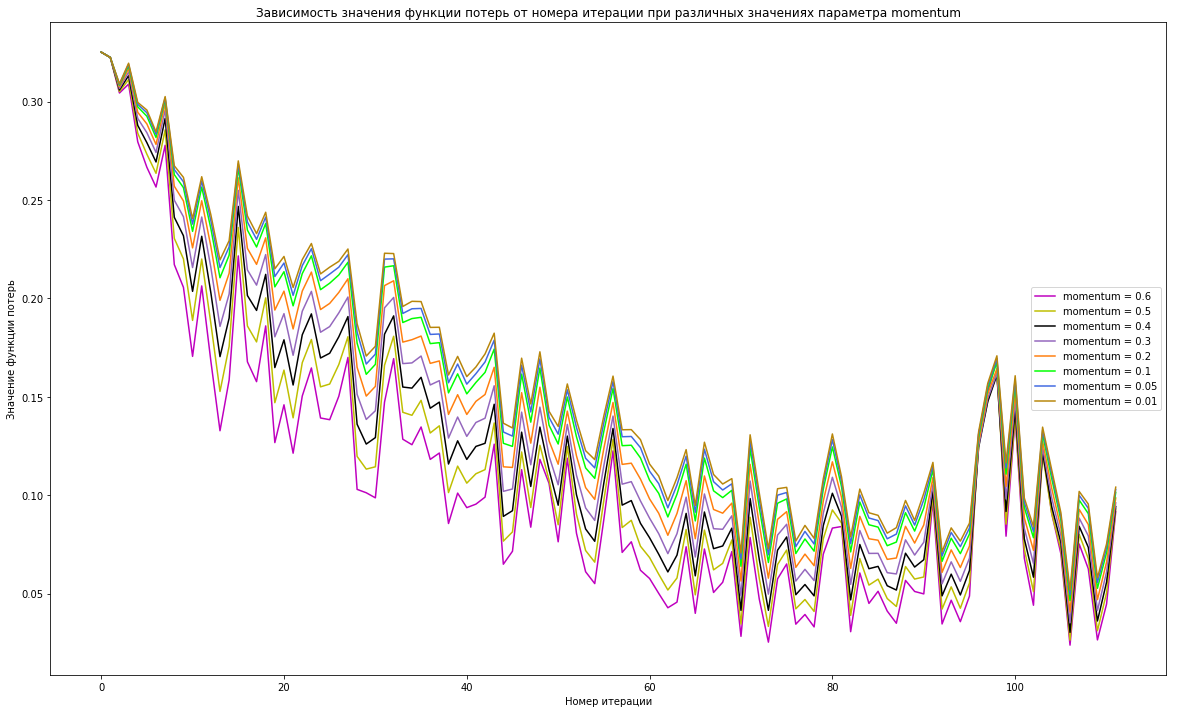

In [0]:
plt.figure(figsize=(20, 12))
for i in range(len(momentum_colors)):
  nn_mnist = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=momentums[i])
  pred = train(X, y, train_op=nn_mnist.minimize(loss))
  plt.plot(pred, color=momentum_colors[i], label="momentum = "+str(momentums[i]))
plt.legend(loc="center right")
plt.title("Зависимость значения функции потерь от номера итерации при различных значениях параметра momentum")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции потерь")

plt.show()

Ваш ответ: Обычно значение momentum берётся равным 0.9, в данном случае я попробовала увеличить его до 1.5, взять стандартное и несколько значений меньше его. Значение функции ошибки на первом графике визуально уменьшалось с уменьшением momentum. При сравнении между собой графиков для значений momentum от 0.6 до 0.01 оптимальным показало себя значение 0.6, при нём значение функции ошибки минимально и алгоритм сходится быстрее всего.

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

In [0]:
lrs = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005, 0.00025]
lr_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'lime', 'royalblue', 'darkgoldenrod', 'cadetblue']

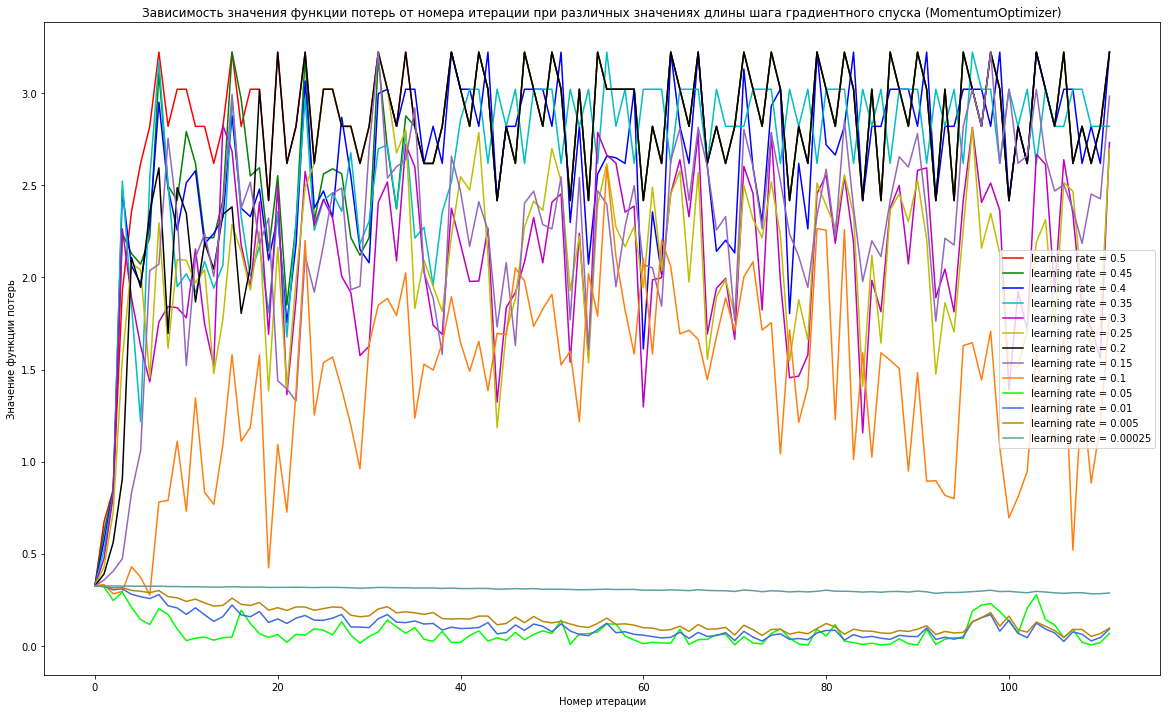

In [0]:
plt.figure(figsize=(20, 12))
for i in range(len(lrs)):
  nn_mnist = tf.train.MomentumOptimizer(learning_rate=lrs[i], momentum=0.6)
  pred = train(X, y, train_op=nn_mnist.minimize(loss))
  plt.plot(pred, color=lr_colors[i], label="learning rate = "+str(lrs[i]))
plt.legend(loc="center right")
plt.title("Зависимость значения функции потерь от номера итерации при различных значениях длины шага градиентного спуска (MomentumOptimizer)")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции потерь")

plt.show()

Ваш ответ: Используя параметр momentum = 0.6, я построила несколько графиков для разных значений learning rate от 0.5 до 0.00025. Исходя из общего графика, значение функции потерь минимально при learning rate = 0.01, при таком задании параметров алгоритм сходится быстрее всего.

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

In [0]:
lrs = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005, 0.00025]
lr_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:orange', 'lime', 'royalblue', 'darkgoldenrod', 'cadetblue']

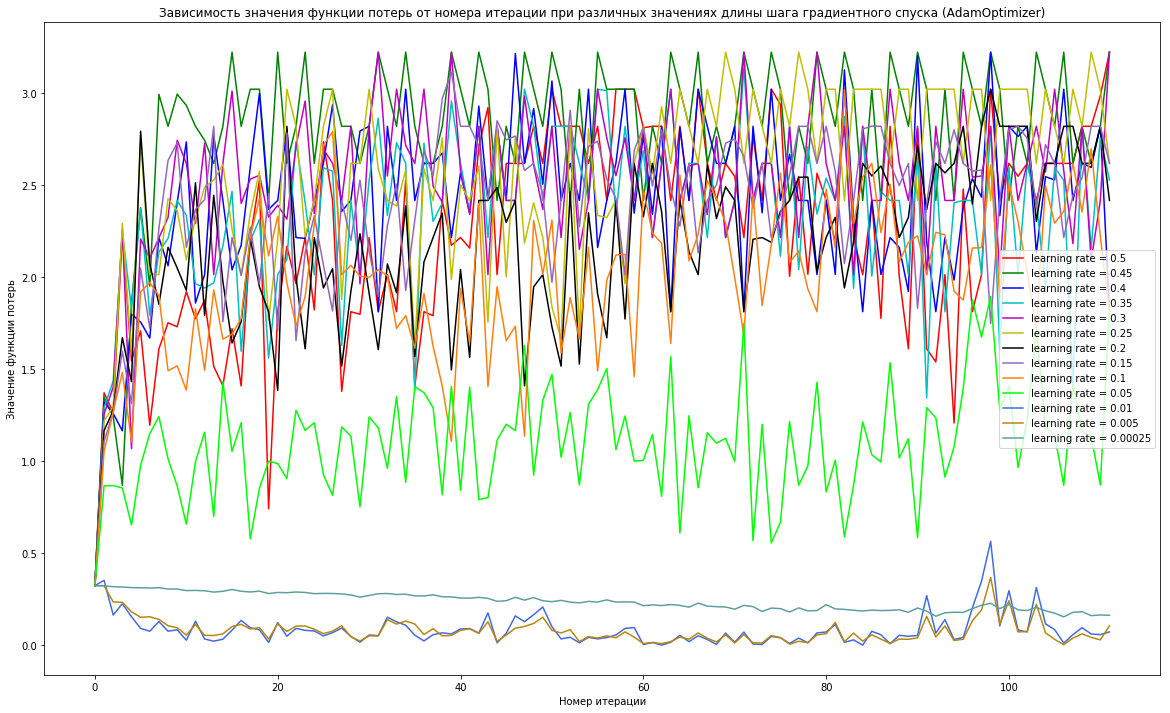

In [0]:
plt.figure(figsize=(20, 12))
for i in range(len(lrs)):
  nn_mnist = tf.train.AdamOptimizer(learning_rate=lrs[i])
  pred = train(X, y, train_op=nn_mnist.minimize(loss))
  plt.plot(pred, color=lr_colors[i], label="learning rate = "+str(lrs[i]))
plt.legend(loc="center right")
plt.title("Зависимость значения функции потерь от номера итерации при различных значениях длины шага градиентного спуска (AdamOptimizer)")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции потерь")

plt.show()

Ваш ответ: Исходя из общего графика, значение функции потерь минимально при learning rate = 0.005, при таком задании параметров алгоритм сходится быстрее всего.

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

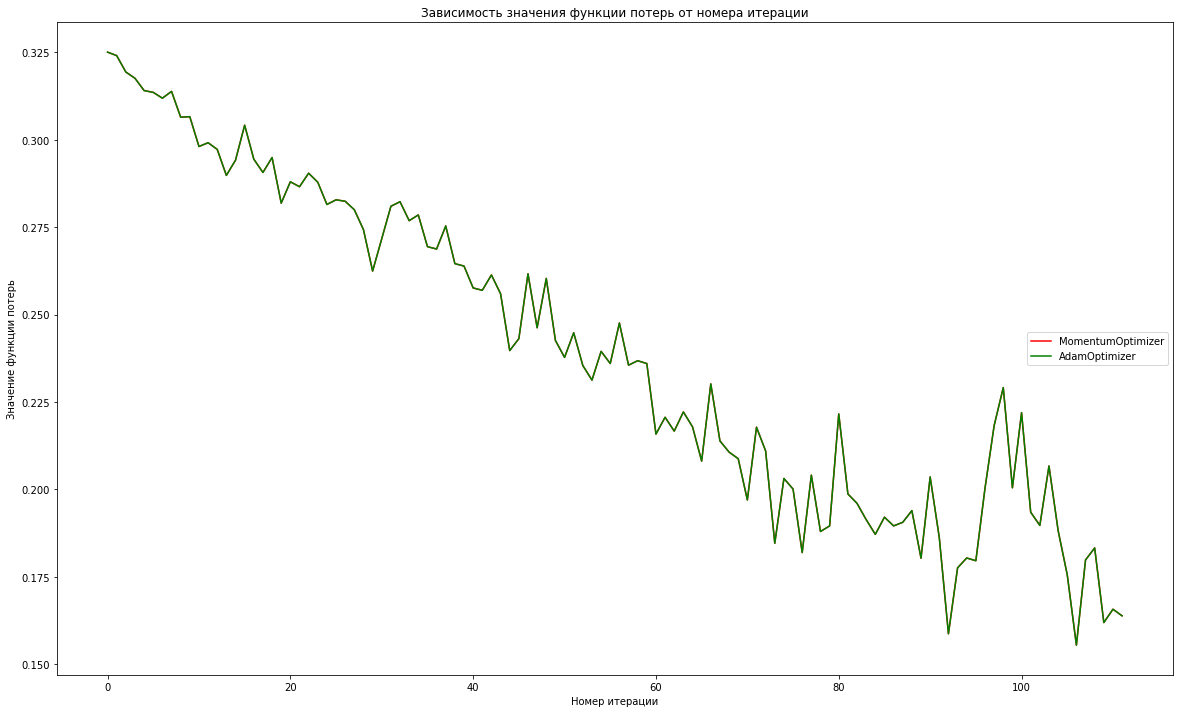

In [0]:
plt.figure(figsize=(20, 12))
nn_mnist_momentum = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.6)
nn_mnist_adam = tf.train.AdamOptimizer(learning_rate=0.005)
pred_momentum = train(X, y, train_op=nn_mnist_momentum.minimize(loss))
pred_adam = train(X, y, train_op=nn_mnist_adam.minimize(loss))
plt.plot(pred, color="r", label="MomentumOptimizer")
plt.plot(pred, color="g", label="AdamOptimizer")
plt.legend(loc="center right")
plt.title("Зависимость значения функции потерь от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции потерь")

plt.show()

Ниже графики перестроены так, чтобы MomentumOptimizer лежал выше AdamOptimizer и перекрывал его в свою очередь.

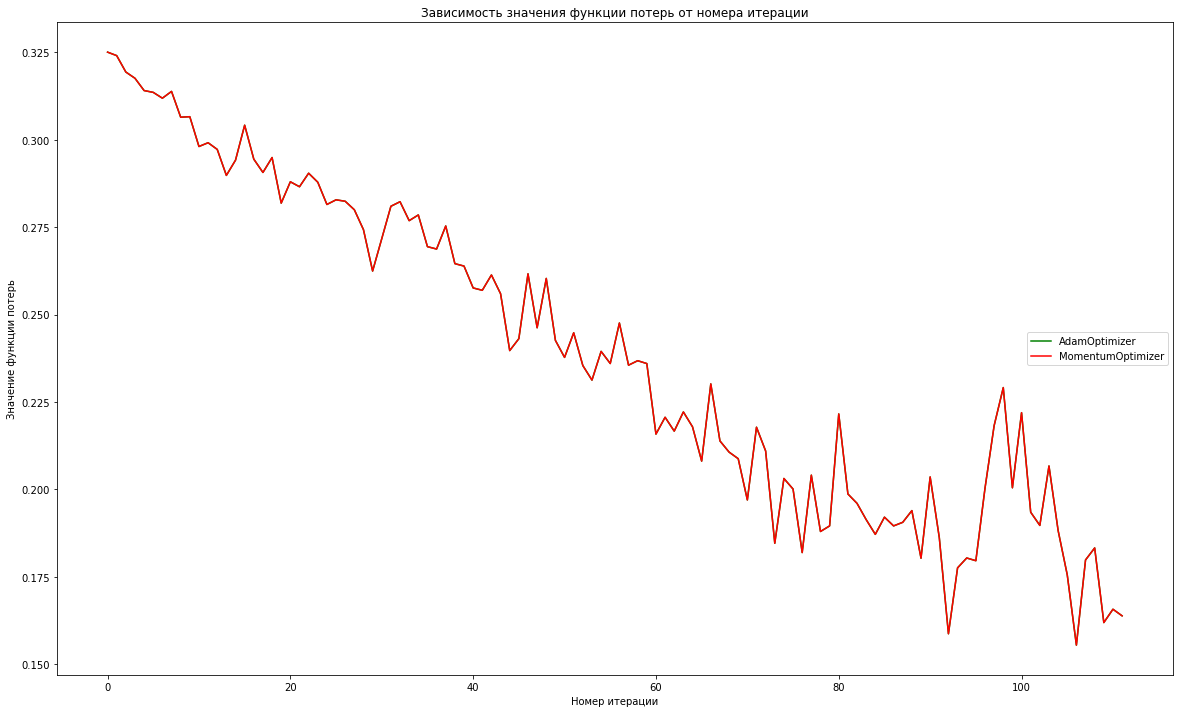

In [0]:
plt.figure(figsize=(20, 12))
nn_mnist_momentum = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.6)
nn_mnist_adam = tf.train.AdamOptimizer(learning_rate=0.005)
pred_momentum = train(X, y, train_op=nn_mnist_momentum.minimize(loss))
pred_adam = train(X, y, train_op=nn_mnist_adam.minimize(loss))
plt.plot(pred, color="g", label="AdamOptimizer")
plt.plot(pred, color="r", label="MomentumOptimizer")
plt.legend(loc="center right")
plt.title("Зависимость значения функции потерь от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции потерь")

plt.show()

Ваш ответ: При подобранных значениях параметров алгоритмы работают одинаково (видно, что оба графика накладываются друг на друга).

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
files.upload()

Saving mnist.py to mnist.py


{'mnist.py': b'import sys\nimport os\nimport time\n\nimport numpy as np\n\n__doc__="""taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""\n\ndef load_dataset():\n    # We first define a download function, supporting both Python 2 and 3.\n    if sys.version_info[0] == 2:\n        from urllib import urlretrieve\n    else:\n        from urllib.request import urlretrieve\n\n    def download(filename, source=\'http://yann.lecun.com/exdb/mnist/\'):\n        print("Downloading %s" % filename)\n        urlretrieve(source + filename, filename)\n\n    # We then define functions for loading MNIST images and labels.\n    # For convenience, they also download the requested files if needed.\n    import gzip\n\n    def load_mnist_images(filename):\n        if not os.path.exists(filename):\n            download(filename)\n        # Read the inputs in Yann LeCun\'s binary format.\n        with gzip.open(filename, \'rb\') as f:\n            data = np.frombuffer(f.read(), np.ui

In [0]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

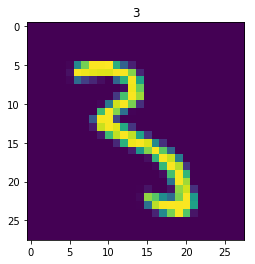

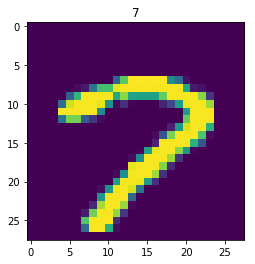

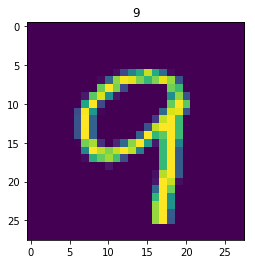

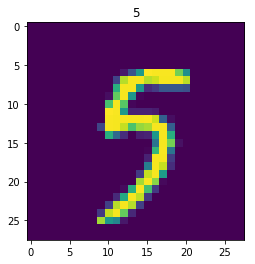

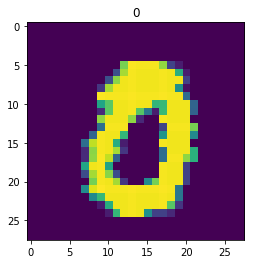

In [0]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [0]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

n_labels = len(np.unique(y_test))
layer1 = tf.layers.dense(X_input, 784, activation=tf.nn.relu) #<define architecture as a function of X_input>
...
logits = tf.layers.dense(layer1, n_labels)
predicted = tf.nn.softmax(logits) #<define 10-class outputs>

loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted) #<define log loss with one-hot vector of labels
train_op = tf.train.AdamOptimizer().minimize(loss) #<define train operation here>

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.979


Я изменила количество нейронов на 784, так как большое их количество в скрытом слое способствует более быстрой конвергенции, и, соответственно, алгоритм быстрее сойдётся. Также я изменила число эпох. Эпоха - прохождение всего датасета через нейронную сеть. В нашем случае оно происходит несколькими итерациями, так как используются батчи, и данные проходят сеть по частям. По завершению последней итерации (прохождению последнего батча через нейросеть) наступает окончание эпохи. Я увеличила количество эпох, так как обновления весов после одного градиентного спуска недостаточно. А если сделать слишком много эпох, можно переобучиться. При числе эпох равном 5 я получила наилучший показатель качества.

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

Я не смогла выбрать лучшую.

Mounted at /content/drive


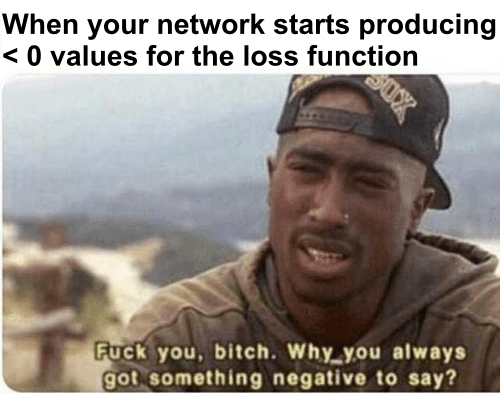

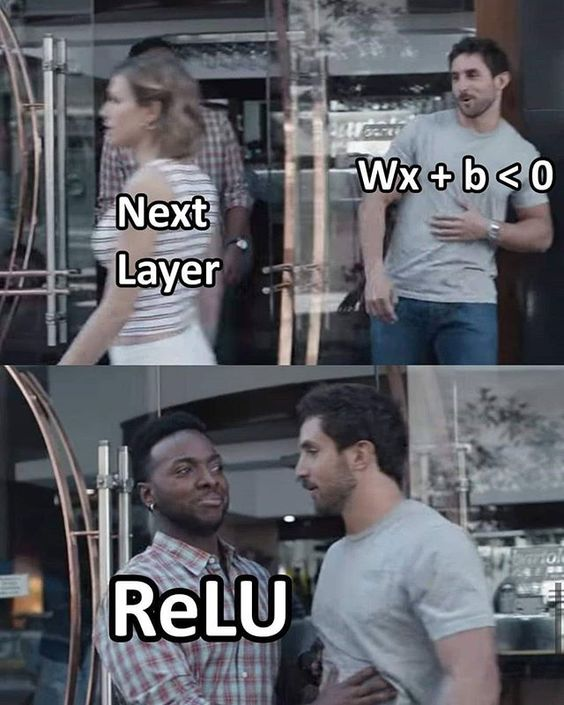

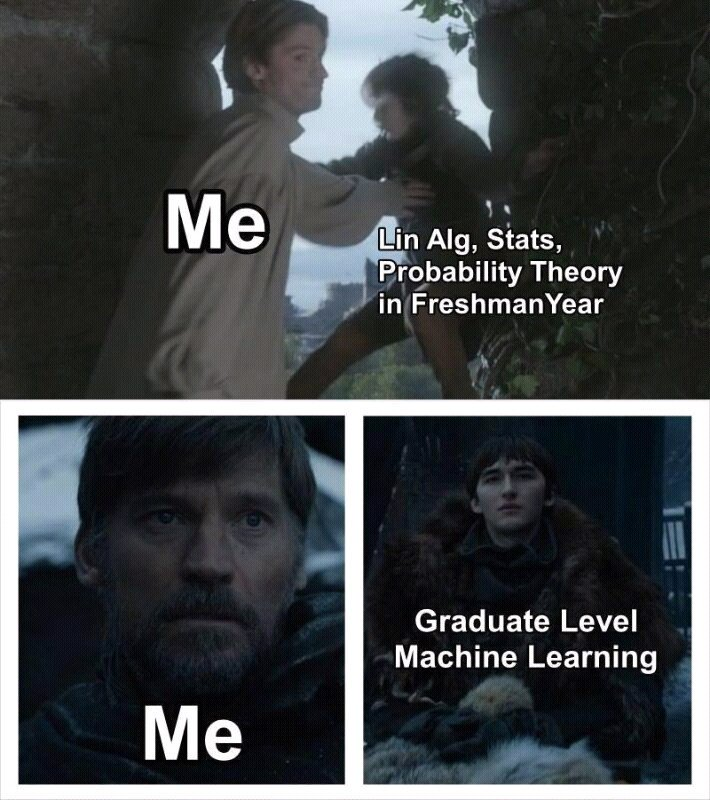

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from IPython.display import Image, display
display(Image('drive/My Drive/MNIST/neg.png'))
display(Image('drive/My Drive/MNIST/relu.jpg'))
display(Image('drive/My Drive/MNIST/dl.jpg'))

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Задания были мне полезны (и выполнимы, что не менее важно), без ошибок. Все домашние задания в этом году проще и короче, так и нужно было делать с самого начала - лучше меньше, но чаще. А самостоятельные в начале занятий помогают закрепить изученный материал. Но есть претензия к курсу - всего 1 семинара в неделю недостаточно, лекции нужны, и очень жаль, что их убрали на эти 2 модуля. И курсы на курсере здесь не спасают. Первая неделя (с Соколовым) была просто отличная, всё понятно и лаконично, Зимовнов тоже неплохо объясняет, но лекции Панина слушать сложно, в субтитрах написано ещё меньше, чем я воспринимаю на слух, и объяснять он не умеет (или я не могу его в полной мере понять). Уверена, что он отличный учёный, но, как преподавателя, я его оценить не могу.